### Sources :
* https://ledatascientist.com/creer-un-modele-de-regression-lineaire-avec-python/
* https://fr.wikipedia.org/wiki/Corrélation_(statistiques)
* https://datatofish.com/convert-string-to-float-dataframe/

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [28]:
# Transformation de notre jeu de données en Data Frame 
globalVF2019 = pd.read_csv("./DATA/RAW/valeursfoncieres-2019.txt", sep="|", decimal = ",", encoding="UTF-8")

In [29]:
globalVF2019.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 2535791 entries, 0 to 2535790
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Code service CH             float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             float64
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code co

In [30]:
globalVF2019[:10]

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,2.0,Appartement,NaN,20.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,2,2.0,Appartement,NaN,62.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,...,NaN,0,1.0,Maison,NaN,90.0,4.0,S,NaN,940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2019,Vente,...,NaN,0,1.0,Maison,NaN,101.0,5.0,S,NaN,490.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2019,Vente,...,NaN,0,1.0,Maison,NaN,88.0,4.0,S,NaN,708.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,...,NaN,0,1.0,Maison,NaN,39.0,2.0,S,NaN,631.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,L,NaN,120.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,2,2.0,Appartement,NaN,69.0,3.0,NaN,NaN,NaN


In [31]:
# On affine notre Dataframe en créant un nouveau Dataframe "vf2019"
vf2019 = globalVF2019[["Nature mutation","Valeur fonciere","Nombre de lots","Code postal","Code departement","Code type local","Type local","Surface reelle bati","Surface Carrez du 1er lot","Nombre pieces principales","Surface terrain"]]

In [32]:
# On filtre uniquement les ventes
vf2019 = vf2019.loc[vf2019["Nature mutation"]=="Vente"]

# On filtre uniquement les ventes des apartements et maisons
vf2019 = vf2019.loc[(vf2019["Type local"]=="Appartement")| (vf2019["Type local"]=="Maison")]

In [33]:
vf2019.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 934965 entries, 0 to 2535790
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Nature mutation            934965 non-null  object 
 1   Valeur fonciere            931357 non-null  float64
 2   Nombre de lots             934965 non-null  int64  
 3   Code postal                934913 non-null  float64
 4   Code departement           934965 non-null  object 
 5   Code type local            934965 non-null  float64
 6   Type local                 934965 non-null  object 
 7   Surface reelle bati        934947 non-null  float64
 8   Surface Carrez du 1er lot  187278 non-null  float64
 9   Nombre pieces principales  934947 non-null  float64
 10  Surface terrain            600241 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 85.6+ MB


In [34]:
# On vérifie s'il n'y pas des valeurs nulles 
vf2019.isnull().sum()

Nature mutation                   0
Valeur fonciere                3608
Nombre de lots                    0
Code postal                      52
Code departement                  0
Code type local                   0
Type local                        0
Surface reelle bati              18
Surface Carrez du 1er lot    747687
Nombre pieces principales        18
Surface terrain              334724
dtype: int64

In [35]:
# On drop les valeurs nulles dans "Valeur fonciere", "Code postal", "Surface reelle bati"
vf2019.dropna(subset = ["Valeur fonciere"], inplace = True)
vf2019.dropna(subset = ["Code postal"], inplace = True)
vf2019.dropna(subset = ["Surface reelle bati"], inplace = True)
vf2019.dropna(subset = ["Code departement"], inplace = True)

In [36]:
vf2019 = vf2019.drop(vf2019.loc[(vf2019["Code departement"] == "2A") | (vf2019["Code departement"] == "2B")].index)

In [37]:
# On verifie si il y a des colonnes qui ne possède pas de valeurs nulles
vf2019.isnull().sum()

Nature mutation                   0
Valeur fonciere                   0
Nombre de lots                    0
Code postal                       0
Code departement                  0
Code type local                   0
Type local                        0
Surface reelle bati               0
Surface Carrez du 1er lot    743381
Nombre pieces principales         0
Surface terrain              333636
dtype: int64

In [38]:
# On transforme "Code postal" et "Code type local" en INT8 au lieu de float64
vf2019["Code postal"] = vf2019["Code postal"].astype('int8')
vf2019["Code type local"] = vf2019["Code type local"].astype('int8')
vf2019["Code departement"] = vf2019["Code departement"].astype('int8')

In [39]:
vf2019.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 930024 entries, 0 to 2535790
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Nature mutation            930024 non-null  object 
 1   Valeur fonciere            930024 non-null  float64
 2   Nombre de lots             930024 non-null  int64  
 3   Code postal                930024 non-null  int8   
 4   Code departement           930024 non-null  int8   
 5   Code type local            930024 non-null  int8   
 6   Type local                 930024 non-null  object 
 7   Surface reelle bati        930024 non-null  float64
 8   Surface Carrez du 1er lot  186643 non-null  float64
 9   Nombre pieces principales  930024 non-null  float64
 10  Surface terrain            596388 non-null  float64
dtypes: float64(5), int64(1), int8(3), object(2)
memory usage: 66.5+ MB


&lt;AxesSubplot:&gt;

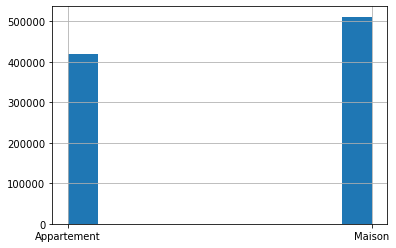

In [40]:
# On regarde le nombre de maison et le nombre d'appartements
vf2019["Type local"].hist()

In [41]:
# On groupe la colonne "Nombre de lots" en comptant le nombre de valeurs foncières, puis on trie par "Nombre de lots" de manière croissante
vf2019.groupby("Nombre de lots")[['Valeur fonciere']].count().sort_values("Nombre de lots")

,Valeur fonciere
Nombre de lots,
0,600887
1,181598
2,127424
3,14151
4,3600
5,1240
6,554
7,247
8,146


In [42]:
# On supprime le nombre de lots supérieurs à 1
vf2019 = vf2019.drop(vf2019.loc[vf2019["Nombre de lots"]> 1].index)

In [43]:
# On groupe la colonne "Nombre de lots" en comptant le nombre de valeurs foncières, puis on trie par "Nombre de lots" de manière croissante après avoir supprimé le nombre de lots supérieurs à 1
vf2019.groupby("Nombre de lots")[['Valeur fonciere']].count().sort_values("Nombre de lots")


,Valeur fonciere
Nombre de lots,
0,600887
1,181598


In [44]:
# Création d'une variable qui contient un nombre maximale de 7 pièces principales 
vf2019 = vf2019.drop(vf2019.loc[vf2019["Nombre pieces principales"]> 8].index)

&lt;AxesSubplot:&gt;

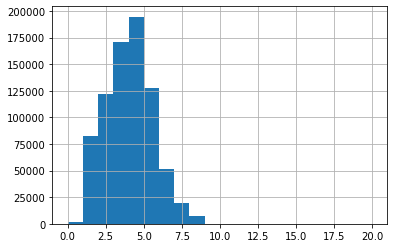

In [45]:
# Création d'un graphique représentant le nombre d'appartement et de maison dont le nombre maximale est de 7 pièces
vf2019["Nombre pieces principales"].hist(bins = 20, range=(0,20))

In [46]:
vf2019['Surface'] = np.where(vf2019["Type local"] == 1, vf2019["Surface reelle bati"],vf2019["Surface Carrez du 1er lot"])

In [51]:
df_matrice = vf2019[["Valeur fonciere","Nombre de lots","Code postal","Code departement","Code type local","Nombre pieces principales","Surface terrain","Surface"]]

&lt;AxesSubplot:&gt;

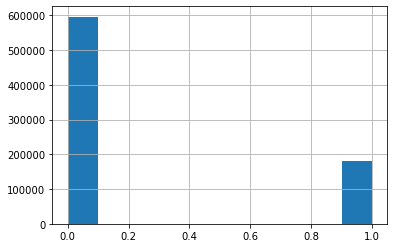

In [57]:
df_matrice["Nombre de lots"].hist()

&lt;AxesSubplot:&gt;

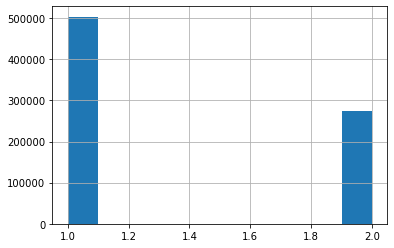

In [59]:
df_matrice["Code type local"].hist()

In [52]:
# Création de la matrice de correlation
matrice_corr = df_matrice.corr().round(3)

&lt;AxesSubplot:&gt;

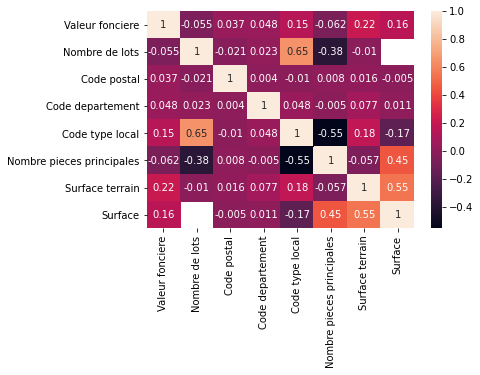

In [53]:
# On affiche la matrice sous forme de carte thermique (heatmap)
sns.heatmap(data=matrice_corr, annot=True)

In [49]:
X = pd.DataFrame(np.c_[vf2019_appart_maison["Surface reelle bati"],vf2019_appart_maison["Nombre pieces principales"]], columns= ["Surface reelle bati","Nombre pieces principales"])
Y = vf2019["Prix"]

NameError: name &#39;vf2019_appart_maison&#39; is not defined

In [ ]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)